In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, add_indicators, add_lags, split_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

---

## For **prepare_data** function

Open      float64
High      float64
Low       float64
Close     float64
Change    float64
Volume      int64
dtype: object


,Open,High,Low,Close,Change,Volume
0,1469.250000,1478.000000,1438.359985,1455.219971,-14.030029,931800000
1,1455.219971,1455.219971,1397.430054,1399.420044,-55.799927,1009000000
2,1399.420044,1413.270020,1377.680054,1402.109985,2.689941,1085500000
3,1402.109985,1411.900024,1392.099976,1403.449951,1.339966,1092300000
4,1403.449951,1441.469971,1400.729980,1441.469971,38.020020,1225200000
...,...,...,...,...,...,...
6053,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000
6054,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000
6055,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000
6056,4925.890137,4931.089844,4916.270020,4924.970215,-0.919922,3836130000


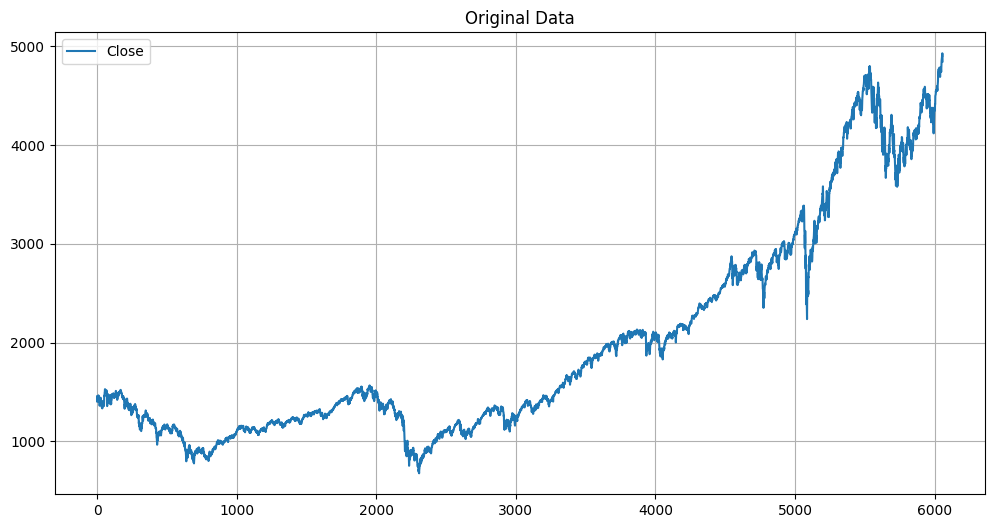

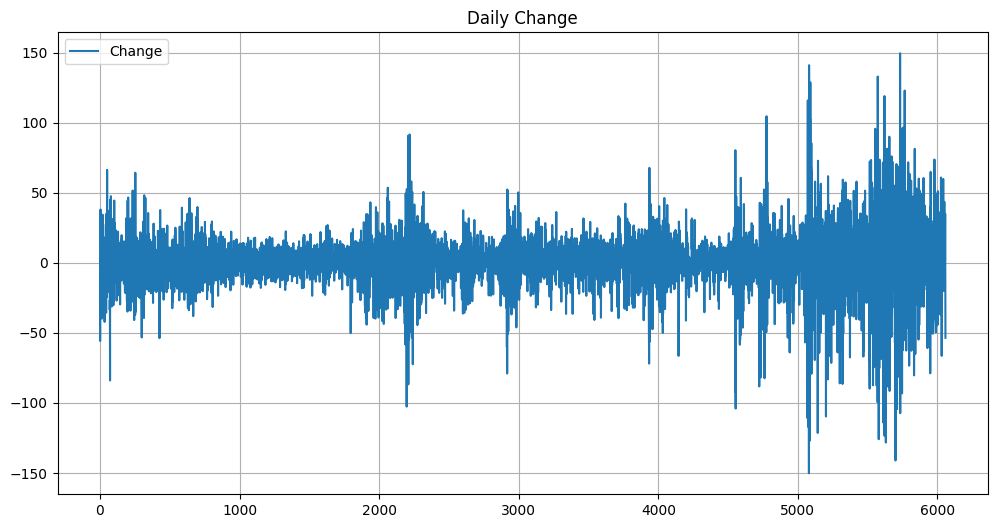

In [3]:
data = prepare_data(SP500_TICKER)


# Show data
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])

data

---

## For **add_indicators** function

In [4]:
# extended_data = add_indicators(data)


# # Show data
# plt = config_chart('RSI Indicator')
# plt.plot(extended_data['RSI'])
# plt.legend(['RSI'])

# plt = config_chart('Simple Moving Average')
# plt.plot(extended_data['MA25'])
# plt.plot(extended_data['MA50'])
# plt.plot(extended_data['MA100'])
# plt.legend(['MA25'])

# extended_data

---

## For add_lags function

In [5]:
# extended_data = add_lags(extended_data)


# # Show data
# extended_data

---
## For split_data function

In [6]:
# indicators_train, indicators_test, target_train, target_test = split_data(extended_data)


# # Show data
# indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

---

## For **normalize_data** function

In [7]:
# normalized_data = normalize_data(data)


# # Show data
# plt = config_chart('Normalized Data')
# plt.plot(normalized_data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

# normalized_data

----

## For **prepare_sequences** function

In [8]:
x, y = prepare_sequences(data)

# Show data
print(x.shape)
print(x[0])
# print(x)

print(y.shape)
print(y[0])
print(y)

# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 1])
# plt.plot(x_dates[0], x[0, :, 2])
# plt.plot(y_dates[0], y[0, :, 1])
# plt.plot(y_dates[0], y[0, :, 2])
# plt.legend(['Direction X', 'Change X', 'Direction Y', 'Change Y'])

# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 0])
# plt.plot(y_dates[0], y[0, :, 0])
# plt.legend(['Price X', 'Price Y'])


(6053, 5, 6)
[[ 1.46925000e+03  1.47800000e+03  1.43835999e+03  1.45521997e+03
  -1.40300293e+01  9.31800000e+08]
 [ 1.45521997e+03  1.45521997e+03  1.39743005e+03  1.39942004e+03
  -5.57999268e+01  1.00900000e+09]
 [ 1.39942004e+03  1.41327002e+03  1.37768005e+03  1.40210999e+03
   2.68994141e+00  1.08550000e+09]
 [ 1.40210999e+03  1.41190002e+03  1.39209998e+03  1.40344995e+03
   1.33996582e+00  1.09230000e+09]
 [ 1.40344995e+03  1.44146997e+03  1.40072998e+03  1.44146997e+03
   3.80200195e+01  1.22520000e+09]]
(6053,)
1
[1 0 0 ... 1 0 0]


---

## For **split_train_and_test_data** function

(4842, 5, 6)
(4842,)
(605, 5, 6)
(605,)
(606, 5, 6)
(606,)


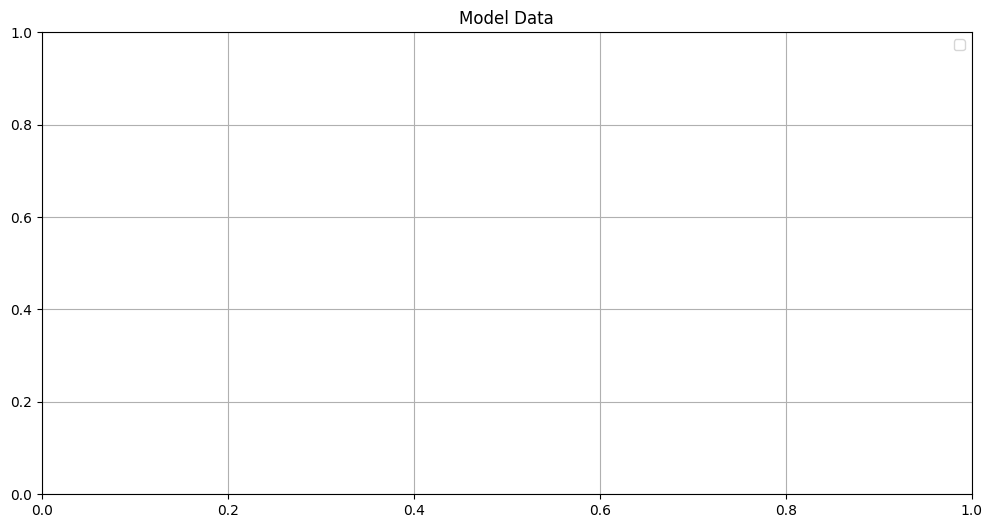

In [9]:
train, test, predict = split_train_and_test_data(x, y)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data')
# plt.plot(train['y'][:, 0])
# plt.plot(test['y'][:, 0, 0])
# plt.plot(predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [10]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [11]:
# x_train.shape, y_train.shape

In [12]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [13]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [14]:
# x_test.shape, y_test.shape

In [15]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [16]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [17]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [18]:
print(train["x"].shape) 
print(train["x"][0])

print(train["y"].shape)
print(train["y"][0])


(4842, 5, 6)
[[ 1.46925000e+03  1.47800000e+03  1.43835999e+03  1.45521997e+03
  -1.40300293e+01  9.31800000e+08]
 [ 1.45521997e+03  1.45521997e+03  1.39743005e+03  1.39942004e+03
  -5.57999268e+01  1.00900000e+09]
 [ 1.39942004e+03  1.41327002e+03  1.37768005e+03  1.40210999e+03
   2.68994141e+00  1.08550000e+09]
 [ 1.40210999e+03  1.41190002e+03  1.39209998e+03  1.40344995e+03
   1.33996582e+00  1.09230000e+09]
 [ 1.40344995e+03  1.44146997e+03  1.40072998e+03  1.44146997e+03
   3.80200195e+01  1.22520000e+09]]
(4842,)
1


In [19]:
print(test["x"].shape) 
print(test["x"][0])

print(test["y"].shape)
print(test["y"][0])

(605, 5, 6)
[[ 2.87609009e+03  2.88525000e+03  2.86516992e+03  2.87339990e+03
  -2.69018555e+00  3.57000000e+09]
 [ 2.87398999e+03  2.88128003e+03  2.86713989e+03  2.87938989e+03
   5.39990234e+00  3.03874000e+09]
 [ 2.88415991e+03  2.89323999e+03  2.88298999e+03  2.89273999e+03
   8.58007812e+00  3.15597000e+09]
 [ 2.88845996e+03  2.89594995e+03  2.88078003e+03  2.89577002e+03
   7.31005859e+00  3.05646000e+09]
 [ 2.88658008e+03  2.88687988e+03  2.87333008e+03  2.87819995e+03
  -8.38012695e+00  3.03248000e+09]]
(605,)
1


In [20]:
print(predict["x"].shape) 
print(predict["x"][0])

print(predict["y"].shape)
print(predict["y"][0])

(606, 5, 6)
[[ 4.49375000e+03  4.49589990e+03  4.46899023e+03  4.47000000e+03
  -2.37500000e+01  3.26398000e+09]
 [ 4.47410010e+03  4.51333008e+03  4.47410010e+03  4.50937012e+03
   3.52700195e+01  3.33120000e+09]
 [ 4.51375977e+03  4.53735986e+03  4.51375977e+03  4.52879004e+03
   1.50302734e+01  3.16866000e+09]
 [ 4.52975000e+03  4.53139014e+03  4.51579980e+03  4.52268018e+03
  -7.06982422e+00  4.29071000e+09]
 [ 4.52879980e+03  4.53710986e+03  4.52202002e+03  4.52408984e+03
  -4.70996094e+00  4.05734000e+09]]
(606,)
1
